In [1]:
#  Enable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

# Lab 1: Investigation of Mitigating Genre-Specific Bias in Movie Perception through Robust Word Embeddings

Group Members:
- Oliver Ansley

- Parker Brown

- Suma Chackola

- Chris Peters


**The execution of this lab was performed collaboratively across 4 computers. Therefore, while the individual cells are not all shown with the direct execution results, the code presented in those cells was utilized to produce the results in this notebook.**

<a id="top"></a>
## Contents
* <a href="#P1">1.0 Introduction</a>
* <a href="#P2">2.0 Training & Modeling </a>
    * <a href="#P21">2.1 Creating the Sentiment Analyzer </a>
    * <a href="#P22">2.2 Loading & Cleaning Data </a>
    * <a href="#P23">2.3 Sentiment Analysis with GloVe </a>
    * <a href="#P24">2.4 Sentiment Analysis with ConceptNet Numberbatch </a>        
* <a href="#P3">3.0 Comparison of Sentiment Analyses </a>
* <a href="#P4">4.0 Conclusion </a>    
________________________________________________________________________________________________________


<a href="#top">Back to Top</a>
<a id="P1"></a>
## 1.0 Introduction to the Embeddings Investigation

### Hypothesis
Our hypothesis is that the use of a robust word embedding model, such as ConceptNet Numberbatch, to analyze movie reviews across genres will be less biased to individual sentiment "keywords" native to the genre and will provide a better representation of the user perception of the movie than a less robust word embedding model, such as GloVe.

For example, we are trying to answer if a romantic comedy is ranked as more positive or if a horror movie is ranked as more negative. We believe that a "lesser" embedding will perform more poorly in the face of a conflicting sentiment lexicon. By this, we expect that "horror" movies may have more "negative" ratings because of the "negative" words used in the reviews to describe the content of the movie, versus the overall context of the review as positive or negative. If the embedding is more narrow-focused, like Glove, it may produce results that bias towards romantic comedies as more positive, since the overall content of the review should have more "positive" words based on the content of the movie. However, we expect an embedding that has a wider knowledge graph focus, like ConceptNet, to remove this bias and focus solely on the review content.

### Approach
To investigate our hypothesis, we utilize a dataset (see below) of IMDB reviews that are pre-labeled as positive or negative and contain movie genres. We will compare the genre-specific bias of movie reviews using the word embeddings of GloVe & ConceptNet. Each of these embeddings will be applied to the movie reviews to determine the overall sentiment of the review. As iterated before, we believe that because of Numberbatch's broader generalization, we can prove that there exists a bias using GLoVe in which a romantic comedy movie, for example, may be rated as positive based on the inherent content of the review even though it received a negative numeric rating.

### Embeddings Models
#### GloVe
We begin our investigation with the Global Vectors for Word Representation, known as GloVe, which obtains vector representations for words through a nearest-neighor metric from a large word vector model. The vector model we've chosen for this analysis is the Common Crawl 840B, which contains 840 billion tokens, 2.2 million word vocabulary, and 300 dimensional vectors. Common Crawl (https://commoncrawl.org/) is an open repository of web crawl data that can be used for language analysis.

GloVe: https://nlp.stanford.edu/projects/glove/
Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. 

Common Crawl 840B: https://nlp.stanford.edu/data/glove.840B.300d.zip

#### ConceptNet Numberbatch
ConceptNet Numberbatch provides word embeddings, similar to GloVe, but from a higher-level structure from the "ConceptNet" project. We claim that ConceptNet Numberbatch is more robust than GloVe. Both models provide adequate capability to perform language analysis. However, the distinguishing feature for ConceptNet Numberbatch is that while GloVe compares the Euclidean distance between words to create its vectors that can be used for analogies for other words, ConceptNet Numberbatch actually uses data from GloVe and other similar sources to not only provide information of word context but also a "common sense" knowledge which is obtained from ConceptNet. It outperforms GloVe and similar embeddings when reviewing word similarity benchmarks.

ConceptNet Numberbatch: https://github.com/commonsense/conceptnet-numberbatch


### Dataset
We utilize a dataset, found in the link below, of IMDB reviews that contains 1 million reviews from 1150 movies spread across 17 genres. In this dataset is other metadata such as the IMDb rating and movie rating. The data was utilized in a paper by Pal, Barigidad, and Mustafi presented at the 2020 International Conference on Computing, Communication, and Security (ICCCS). In their analysis, they used the content of the movie reviews to classify the genre of the movie through word tokenization and a keyword list specific to the genres, similar to the process we are following for sentiment analysis, however, from the results they created their own "Movie Recommender" based on a genre input from a user.

- Data Source: https://ieee-dataport.org/open-access/imdb-movie-reviews-dataset

- Reference Paper: https://ieeexplore-ieee-org.proxy.libraries.smu.edu/document/9276893. A. Pal, A. Barigidad and A. Mustafi, "Identifying movie genre compositions using neural networks and introducing GenRec-a recommender system based on audience genre perception," 2020 5th International Conference on Computing, Communication and Security (ICCCS), Patna, India, 2020, pp. 1-7, doi: 10.1109/ICCCS49678.2020.9276893. 

### Comparison metric
In our analysis, we utilize the F-score statistical testing as a metric to compare the performance the models. F-score is an analysis of variance approach (ANOVA) that determines the statistical difference of two or more populations in hypothesis testing by comparing their variances. To do this, we divide the population sample variance between the groups by the variance within the groups to generate the F-score. If the F-score exceeds a certain value, then the null hypothesis can be rejected because the null hypothesis assumes that the variances are equal. If the F-score does not exceed this value, we cannot reject the null hypothesis because the evidence does not provide the conclusion that there is significant differnce in the variance. 

In the case of this analysis, our null hypothesis is that the use of a robust word embedding model, such as ConceptNet Numberbatch, to analyze movie reviews across genres is **no less** biased to individual sentiment "keywords" native to the genre and will **not** provide a better representation of the user perception of the movie than a less robust word embedding model, such as GloVe.

Source: https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/

### Relevance
**Why is it important to find this kind of bias in machine learning models?**

Machine learning language models generate associations with commonly used words, and these associations are based on human intentional and unintentional bias to people groups or ideologies. In the sense of creating an ethical system that is  beneficial to individuals and society, it is critical for the system to also be respectful and fair, such that it honors diversity in humans and does not result in unfair discrimination. Unfortunately, the internet contains a broad source of biased speech and it is very challenging to disassociate the bias while generating a language model that is representative of a given language.  ConceptNet Numberbatch version 17.04 and later actually utilizes a capability to counteract bias during its build process so that the word vectors are less prejudiced than GloVe.

**Why will the type of investigation I am performing be relevant to other researchers or practitioners?**

Our extension of bias analysis to movie reviews can be perceived as a lot less "socially heavy" than racial or gender issues. When we are generally considering equity in two items, we are seeking ways to evaluate the quality of the individual items without persuasion towards our own preconceived thoughts of the greater group that the items belong to. Therefore, we are extending this idea of bias movies, but it can also be extended towards other media like music. It is important for an art critic to be able to extend a judgement on a work based on its ability to convey an emotion or an idea. If that critic cannot see beyond their own tastes for Country music or Heavy Metal for an analysis of a Jazz piece, then the bias of the critic can overcome the value of response of the critic. This is similar to the idea of "you cannot judge a fish by its ability to climb a tree". For the positive/negative movie review analysis, a study on the review lexicon can be biased from the the true nature of the review because of the association of the genre to positive/negative semantics. Extracting the overall meaning of the review requires the removal of the "narrow" word association and instead requires the addition of the "broad" understanding of the review content. 

Therefore it is important to develop a machine learning model that can provide a quality assessment of a movie without bias towards the sentiment of aspects inherent to the genre of the movie in order to create a "digital critic". Other researchers can extend the ideas and the approach in this work to other media, such as book reviews or music reviews, in an effort to improve the "crowdsourcing" of the perception of new media and determine what needs to be augmented in these embedding models to further associate the general feedback from a movie with its overall likeability rating. As the perception models improve, the industry will have a better understanding of what appeals to the public, which leads to a financial optimization. 

<a href="#top">Back to Top</a>
<a id="P2"></a>
## 2.0 Training / Modeling

<a id="P21"></a>
### Loading Embeddings and Lexicons

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#this code is taken from LectureNotesMaster/01 ConceptNet.ipynb notebook shared by Prof E Larson/Robyn Speer

def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/glove.840B.300d.txt')
embeddings.shape

(2196018, 300)

In [4]:
#Loading the lexicon
def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))

2006 4783


### Preparing Sentiment Classifier

In [5]:
#train the model
pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)

(1974, 300) (4642, 300)


In [6]:
#train the inputs and outputs
vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)

In [7]:
#prep for train test split
train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [9]:
# create a linear classifier 
model = SGDClassifier(loss='log_loss', random_state=0, max_iter=100)
model.fit(train_vectors, train_targets)
accuracy_score(model.predict(test_vectors), test_targets)



0.9425981873111783

### Sentiment Analysis Functions

In [10]:
def vecs_to_sentiment(vecs):
    # predict_log_proba gives the log probability for each class
    predictions = model.predict_log_proba(vecs)

    # To see an overall positive vs. negative classification in one number,
    # we take the log probability of positive sentiment minus the log
    # probability of negative sentiment.
    # this is a logarithm of the max margin for the classifier, 
    # similar to odds ratio (but not exact) log(p_1/p_0) = log(p_1)-log(p_0)
    return predictions[:, 1] - predictions[:, 0]


def words_to_sentiment(words):
    # Filter the list of words to only include those present in the embeddings
    filtered_words = [word for word in words if word in embeddings.index]
    
    # If no words are found in the embeddings, return an empty DataFrame or some default sentiment value
    if not filtered_words:
        return pd.DataFrame({'sentiment': []})
    
    vecs = embeddings.loc[filtered_words].dropna()
    log_odds = vecs_to_sentiment(vecs)
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)



# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[:20]

,sentiment
irritable,-15.595353
well-balanced,14.286387
scary,-12.960400
overwhelms,-4.049308
humorously,-1.533808
lustrous,13.123550
peacefully,5.328928
vent,-10.015804
hypocritically,-8.096680
harass,-14.672296


In [11]:
#tokenize using regular expressions

TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # Tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # Filter tokens to include only those that are in the embeddings' index
    tokens = [token for token in tokens if token in embeddings.index]
    
    # If no tokens are found in the embeddings, return a default sentiment value, e.g., 0
    if not tokens:
        return 0  # This is a neutral sentiment score
    
    sentiments = words_to_sentiment(tokens)
    if sentiments.empty:
        return 0  # Again, returning a neutral sentiment score if no sentiments were computed
    return sentiments['sentiment'].mean()  # Return the mean sentiment for the remaining tokens


<a href="#top">Back to Top</a><a id="P22"></a>
### Loading Movie Data

In [12]:
#Load the movie list for Comedy
import pandas as pd
df_cat1_movies = pd.read_csv('data/movie_dataset/1_movies_per_genre/Comedy.csv', sep = ',')
df_cat1_movies.head()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,Guardians of the Galaxy,2014,PG-13,2h 1min,Comedy;,1 August 2014 (USA),8.0,1017578,1390,https://www.imdb.com/title/tt2015381/reviews/_...
1,Back to the Future,1985,PG,1h 56min,Comedy;,3 July 1985 (USA),8.5,1015437,1178,https://www.imdb.com/title/tt0088763/reviews/_...
2,Finding Nemo,2003,G,1h 40min,Comedy;,30 May 2003 (USA),8.1,922237,968,https://www.imdb.com/title/tt0266543/reviews/_...
3,Up,2009,PG,1h 36min,Comedy;,29 May 2009 (USA),8.2,905205,891,https://www.imdb.com/title/tt1049413/reviews/_...
4,The Truman Show,1998,PG,1h 43min,Comedy;,5 June 1998 (USA),8.1,901368,1152,https://www.imdb.com/title/tt0120382/reviews/_...


In [13]:
df_cat2_movies = pd.read_csv('data/movie_dataset/1_movies_per_genre/Horror.csv', sep = ',')
df_cat2_movies.head()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Shining,1980,R,2h 26min,Drama; Horror;,13 June 1980 (USA),8.4,860290,1805,https://www.imdb.com/title/tt0081505/reviews/_...
1,Alien,1979,R,1h 57min,Horror; Sci-Fi;,22 June 1979 (USA),8.4,762793,1423,https://www.imdb.com/title/tt0078748/reviews/_...
2,World War Z,2013,PG-13,1h 56min,Action; Adventure; Horror;,21 June 2013 (USA),7.0,586801,1125,https://www.imdb.com/title/tt0816711/reviews/_...
3,Psycho,1960,R,1h 49min,Horror; Mystery; Thriller;,8 September 1960 (USA),8.5,580951,1263,https://www.imdb.com/title/tt0054215/reviews/_...
4,Shaun of the Dead,2004,R,1h 39min,Comedy; Horror;,24 September 2004 (USA),7.9,499244,971,https://www.imdb.com/title/tt0365748/reviews/_...


In [14]:
#I feel name, year and genres cols in the csv files are sufficient to retain, drop the rest, add cols back in as needed
df_cat1_movies_lim=df_cat1_movies[['name', 'year',  'genres']]
df_cat2_movies_lim=df_cat2_movies[['name', 'year', 'genres']]

In [15]:
df_concat_movies = pd.concat([df_cat1_movies_lim, df_cat2_movies_lim])
df_concat_movies['file_name'] = df_concat_movies['name'] + ' ' + df_concat_movies['year'].astype(str) + '.csv'

df_concat_movies.head()

,name,year,genres,file_name
0,Guardians of the Galaxy,2014,Comedy;,Guardians of the Galaxy 2014.csv
1,Back to the Future,1985,Comedy;,Back to the Future 1985.csv
2,Finding Nemo,2003,Comedy;,Finding Nemo 2003.csv
3,Up,2009,Comedy;,Up 2009.csv
4,The Truman Show,1998,Comedy;,The Truman Show 1998.csv


### Combining Movie Reviews

In [16]:
#https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
# and https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
import os
directory = 'data/movie_dataset/2_reviews_per_movie_raw'

dfs = list()

# iterate over files in
# that directory
for filename in os.listdir(directory):	
	#print('looking for :', filename) 
	if df_concat_movies['file_name'].eq(filename).any():		
		data = pd.read_csv(os.path.join(directory, filename), header=None)
		data['file_name'] = filename
#		data['genre'] = df_concat_movies['genres']        
		dfs.append(data)
df = pd.concat(dfs, ignore_index=True)

Continuing with some data cleanup

In [17]:
df = pd.DataFrame(df)
df = df.rename(columns={"filename": "file_name"})
df_all = df_concat_movies.merge(df)
df_all.columns = df_all.iloc[0]
df_all = df_all[1:]
df_all = df_all.reset_index(drop=True)
# Fixing a weird result from the merge - this seems to work ok
df_all = df_all.rename(columns={"Guardians of the Galaxy": "film name", 2014: "year", 'Comedy; ': "genre", "Guardians of the Galaxy 2014.csv": "file_name"})
df_all = df_all.drop(columns=['file_name','username', 'helpful', 'total', 'date','title'])
df_all['genre'] = df_all['genre'].str.replace(';','',regex=True)
df_all.head()

,film name,year,genre,rating,review
0,Guardians of the Galaxy,2014,Comedy,10,Guardians of the Galaxy is nothing short of an...
1,Guardians of the Galaxy,2014,Comedy,9,I originally saw in the theater which was grea...
2,Guardians of the Galaxy,2014,Comedy,9,I remember sitting in Hall H at Comic-Con two ...
3,Guardians of the Galaxy,2014,Comedy,9,Expectations: surpassed - and they were pretty...
4,Guardians of the Galaxy,2014,Comedy,10,I entitle my review A New Hope as I walk out o...


In [18]:
df_all.to_csv('df_all.csv', index=False)

In [78]:
df_all = pd.read_csv('df_all.csv')

In [79]:
df_all.head()

,film name,year,genre,rating,review
0,Guardians of the Galaxy,2014,Comedy,10,Guardians of the Galaxy is nothing short of an...
1,Guardians of the Galaxy,2014,Comedy,9,I originally saw in the theater which was grea...
2,Guardians of the Galaxy,2014,Comedy,9,I remember sitting in Hall H at Comic-Con two ...
3,Guardians of the Galaxy,2014,Comedy,9,Expectations: surpassed - and they were pretty...
4,Guardians of the Galaxy,2014,Comedy,10,I entitle my review A New Hope as I walk out o...


In [27]:
def drop_null_ratings(df):
    # Convert non-numeric values to NaN in the "rating" column
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

    # Drop rows where "rating" is NaN
    df = df.dropna(subset=['rating'])

    return df

In [28]:
# Filter for 'Comedy' genre only (excluding rows that also contain 'Horror')
df_romcom = df_all[df_all['genre'].str.contains('Comedy') & ~df_all['genre'].str.contains('Horror')]

# Filter for 'Horror' genre only (excluding rows that also contain 'Comedy')
df_horror = df_all[df_all['genre'].str.contains('Horror') & ~df_all['genre'].str.contains('Comedy')]

df_romcom = drop_null_ratings(df_romcom)
df_horror = drop_null_ratings(df_horror)

C:\Users\Oliver\AppData\Local\Temp\ipykernel_7632\3443147479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
C:\Users\Oliver\AppData\Local\Temp\ipykernel_7632\3443147479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [29]:
df_romcom.head()

,film name,year,genre,rating,review
0,Guardians of the Galaxy,2014,Comedy,10.0,Guardians of the Galaxy is nothing short of an...
1,Guardians of the Galaxy,2014,Comedy,9.0,I originally saw in the theater which was grea...
2,Guardians of the Galaxy,2014,Comedy,9.0,I remember sitting in Hall H at Comic-Con two ...
3,Guardians of the Galaxy,2014,Comedy,9.0,Expectations: surpassed - and they were pretty...
4,Guardians of the Galaxy,2014,Comedy,10.0,I entitle my review A New Hope as I walk out o...


In [30]:
df_horror.head()

,film name,year,genre,rating,review
79764,The Shining,1980,Drama Horror,9.0,Even though The Shining is over a quarter of a...
79765,The Shining,1980,Drama Horror,9.0,"Chilling, majestic piece of cinematic fright, ..."
79768,The Shining,1980,Drama Horror,10.0,"The Shining, you know what's weird about this ..."
79769,The Shining,1980,Drama Horror,10.0,"Okay, okay, maybe not THE greatest. I mean, Th..."
79772,The Shining,1980,Drama Horror,5.0,"Once again, I decided to check out a highly re..."


We have 174941 rows of movie reviews, with 5 columns of information: 
- Film Name
- Year
- Genre
- Rating
- Review


<a href="#top">Back to Top</a>
<a id="P23"></a>
### Sentiment Analysis with GloVe

In [ ]:
# The following code (getting sentiment from GloVe) takes about 6 hours to run.
# Instead, use the CSV files below which contain the sentiments from the output.
"""
# Apply the text_to_sentiment function to each review in the df_romcom DataFrame
df_romcom['sentiment'] = df_romcom['review'].apply(text_to_sentiment)

# Calculate the average sentiment for comedies
average_sentiment_comedy = df_romcom['sentiment'].mean()

# Apply the text_to_sentiment function to each review in the df_horror DataFrame
df_horror['sentiment'] = df_horror['review'].apply(text_to_sentiment)

# Calculate the average sentiment for horror movies
average_sentiment_horror = df_horror['sentiment'].mean()

# Print the average sentiments
print(f"Average Sentiment for Comedies: {average_sentiment_comedy}")
print(f"Average Sentiment for Horror Movies: {average_sentiment_horror}")
"""

'\n# Apply the text_to_sentiment function to each review in the df_romcom DataFrame\ndf_romcom[\'sentiment\'] = df_romcom[\'review\'].apply(text_to_sentiment)\n\n# Calculate the average sentiment for comedies\naverage_sentiment_comedy = df_romcom[\'sentiment\'].mean()\n\n# Apply the text_to_sentiment function to each review in the df_horror DataFrame\ndf_horror[\'sentiment\'] = df_horror[\'review\'].apply(text_to_sentiment)\n\n# Calculate the average sentiment for horror movies\naverage_sentiment_horror = df_horror[\'sentiment\'].mean()\n\n# Print the average sentiments\nprint(f"Average Sentiment for Comedies: {average_sentiment_comedy}")\nprint(f"Average Sentiment for Horror Movies: {average_sentiment_horror}")\n'

In [31]:
#Average Sentiment for Comedies: 0.36794964103811045
average_sentiment_comedy = 0.36794964103811045
#Average Sentiment for Horror Movies: -0.15294894375162382
average_sentiment_horror = -0.15294894375162382

In [32]:
df_romcom_glove_trim = pd.read_csv("df_romcom_glove_trim.csv").drop(columns=["year", "genre"]).dropna()
df_horror_glove_trim = pd.read_csv("df_horror_glove_trim.csv").drop(columns=["year", "genre"]).dropna()
df_romcom_glove_trim.head()

,film name,rating,sentiment
0,Guardians of the Galaxy,10,0.787825
1,Guardians of the Galaxy,9,2.014900
2,Guardians of the Galaxy,9,0.716487
3,Guardians of the Galaxy,9,1.347274
4,Guardians of the Galaxy,10,1.005797


c:\Users\Oliver\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


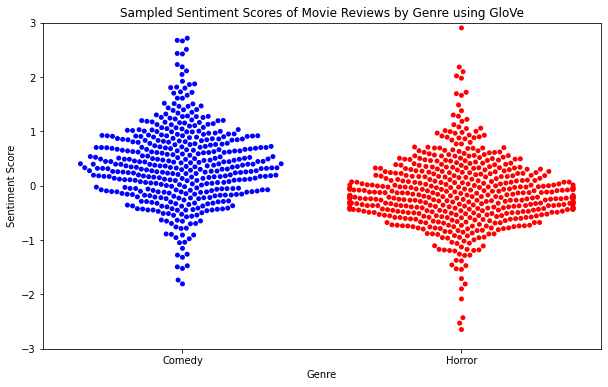

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Add a new column to each DataFrame to distinguish genres
df_romcom_glove_trim['genre'] = 'Comedy'
df_horror_glove_trim['genre'] = 'Horror'

# Combine the two DataFrames into one
df_combined = pd.concat([df_romcom_glove_trim[['sentiment', 'genre']], df_horror_glove_trim[['sentiment', 'genre']]])

# Sample a subset of the data for plotting
df_sampled = df_combined.sample(n=1000, random_state=1)  # Adjust n as needed

# Plot the sampled data
plt.figure(figsize=(10, 6))
sns.swarmplot(x='genre', y='sentiment', data=df_sampled, palette={'Comedy': 'blue', 'Horror': 'red'})
plt.title('Sampled Sentiment Scores of Movie Reviews by Genre using GloVe')
plt.xlabel('Genre')
plt.ylabel('Sentiment Score')
plt.ylim(-3, 3) 

plt.show()

Based on the sample, comedy sentiment score  mean appears to be overall a bit higher than horror. But this may vary based on the sample. The swarm plot indicates the data for comedy has more values greater than 0 and more positive outlier values for comedy. Where as the negative tail of horror indicates there may be some reviews that had very high negative values. Overall the number of negative sentiments around or below 0 for horror seem to outweigh the positive sentiments.

<a href="#top">Back to Top</a>
<a id="P24"></a>
### Perform Similar Analysis with ConceptNet


In [34]:
embeddings = load_embeddings('data/numberbatch-en-17.04b.txt')
embeddings.shape

#train the model
pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)

#train the inputs and outputs
vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)

#prep for train test split
train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

# create a linear classifier 
model = SGDClassifier(loss='log', random_state=0, max_iter=100)
model.fit(train_vectors, train_targets)
accuracy_score(model.predict(test_vectors), test_targets)

# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[:20]

#tokenize using regular expressions

TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


(1821, 300) (4461, 300)


Get sentiments from CN

In [ ]:
"""
# Apply the text_to_sentiment function to each review in the df_romcom DataFrame
df_romcom['sentiment'] = df_romcom['review'].apply(text_to_sentiment)

# Calculate the average sentiment for comedies
average_sentiment_comedy = df_romcom['sentiment'].mean()

# Apply the text_to_sentiment function to each review in the df_horror DataFrame
df_horror['sentiment'] = df_horror['review'].apply(text_to_sentiment)

# Calculate the average sentiment for horror movies
average_sentiment_horror = df_horror['sentiment'].mean()

# Print the average sentiments
print(f"Average Sentiment for Comedies: {average_sentiment_comedy}")
print(f"Average Sentiment for Horror Movies: {average_sentiment_horror}")
"""

- Average Sentiment for Comedies: 0.029119482163650175
- Average Sentiment for Horror Movies: -0.20205652231804702

Output sentiments to CSV

In [37]:
# df_romcom.to_csv('df_romcom_cnnb.csv', index=False)
# df_horror.to_csv('df_horror_cnnb.csv', index=False)
# df_romcom_cnnb_trim = df_romcom.drop(columns=['review'])
# df_horror_cnnb_trim = df_horror.drop(columns=['review'])
# df_romcom_cnnb_trim.to_csv('df_romcom_cnnb_trim.csv', index=False)
# df_horror_cnnb_trim.to_csv('df_horror_cnnb_trim.csv', index=False)

In [39]:
df_romcom_cnnb_trim = pd.read_csv('df_romcom_cnnb_trim.csv')
df_horror_cnnb_trim = pd.read_csv('df_horror_cnnb_trim.csv')

c:\Users\Oliver\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


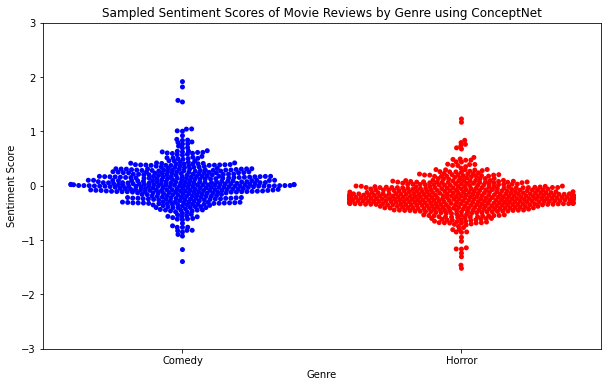

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Add a new column to each DataFrame to distinguish genres
df_romcom_cnnb_trim['genre'] = 'Comedy'
df_horror_cnnb_trim['genre'] = 'Horror'

# Combine the two DataFrames into one
df_combined = pd.concat([df_romcom_cnnb_trim[['sentiment', 'genre']], df_horror_cnnb_trim[['sentiment', 'genre']]])

# Sample a subset of the data for plotting
df_sampled = df_combined.sample(n=1000, random_state=1)  # Adjust n as needed

# Plot the sampled data
plt.figure(figsize=(10, 6))
sns.swarmplot(x='genre', y='sentiment', data=df_sampled, palette={'Comedy': 'blue', 'Horror': 'red'})
plt.title('Sampled Sentiment Scores of Movie Reviews by Genre using ConceptNet')
plt.xlabel('Genre')
plt.ylabel('Sentiment Score')
plt.ylim(-3,3) 

plt.show()

ConceptNet data shows a lot of overlap between Comedy and GloVe embeddings. The mean of both appear to be very close to 0. The outliers of horror in is not as widespread as it is for Comedy indicating some much higher positive sentiment scores for comedy than horror as was expected. Overall the majority of the scores hover around 0 which I believe must indicate neutral sentiment.

<a href="#top">Back to Top</a>
<a id="P3"></a>
## 3.0 Analysis: Comparison of Results from Sentiment Analyses
Now that the reviews have been given a sentiment score using Glove and ConceptNet, we begin the analysis. We will use the F-test which is a statistical test used to compare the variances of two or more samples or populations in hypothesis testing to determine whether they are significantly different or not. 

The null hypothesis is that there is NO difference in the variance of the two genres. The alternate hypothesis therefore is that there is a significant variance between the two groups based on the sentiment score.

We will run the f-test before we normalize the data and also after, just for affirmation.

The f-test will look at comparing the f-stat with the f-critical value to determine whether to accept or reject the null hypothesis. Alternatively we can use the p-value, compared with the significance level and accept or reject the hypothesis. Lets go!

In [43]:
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')
#Load GloVe Horror Results
df_horror_glove_trim = pd.read_csv('df_horror_glove_trim.csv', sep = ',')
df_horror_glove_trim = drop_null_ratings(df_horror_glove_trim)
df_horror_glove_trim.head()

,film name,year,genre,rating,sentiment
4,The Shining,1980,Drama Horror,9.0,-0.084957
5,The Shining,1980,Drama Horror,9.0,0.110383
8,The Shining,1980,Drama Horror,10.0,0.074948
9,The Shining,1980,Drama Horror,10.0,0.180767
12,The Shining,1980,Drama Horror,5.0,-0.215878


In [44]:
#Load GloVe RomCom Results
df_romcom_glove_trim = pd.read_csv('df_romcom_glove_trim.csv', sep = ',')
df_romcom_glove_trim = drop_null_ratings(df_romcom_glove_trim)
df_romcom_glove_trim.head()

,film name,year,genre,rating,sentiment
0,Guardians of the Galaxy,2014,Comedy,10.0,0.787825
1,Guardians of the Galaxy,2014,Comedy,9.0,2.014900
2,Guardians of the Galaxy,2014,Comedy,9.0,0.716487
3,Guardians of the Galaxy,2014,Comedy,9.0,1.347274
4,Guardians of the Galaxy,2014,Comedy,10.0,1.005797


In [45]:
#Load ConceptNet NumberBatch Horror Results
df_horror_cnnb_trim = pd.read_csv('df_horror_cnnb_trim.csv', sep = ',')
df_horror_cnnb_trim = drop_null_ratings(df_horror_cnnb_trim)
df_horror_cnnb_trim.head()

,film name,year,genre,rating,sentiment
4,The Shining,1980,Drama Horror,9.0,-0.291112
5,The Shining,1980,Drama Horror,9.0,-0.021392
8,The Shining,1980,Drama Horror,10.0,-0.168464
9,The Shining,1980,Drama Horror,10.0,-0.035796
12,The Shining,1980,Drama Horror,5.0,-0.165677


In [46]:
#Load ConceptNet NumberBatch RomCom Results
df_romcom_cnnb_trim = pd.read_csv('df_romcom_cnnb_trim.csv', sep = ',')
df_romcom_cnnb_trim = drop_null_ratings(df_romcom_cnnb_trim)
df_romcom_cnnb_trim.head()

,film name,year,genre,rating,sentiment
0,Guardians of the Galaxy,2014,Comedy,10.0,0.235207
1,Guardians of the Galaxy,2014,Comedy,9.0,0.975840
2,Guardians of the Galaxy,2014,Comedy,9.0,0.134740
3,Guardians of the Galaxy,2014,Comedy,9.0,0.293742
4,Guardians of the Galaxy,2014,Comedy,10.0,0.283084


In [48]:
#this data prep needs to be done as genre is being used for grouping
df_romcom_glove_trim['genre'] = 'Comedy'
df_horror_glove_trim['genre'] = 'Horror'

df_romcom_cnnb_trim['genre'] = 'Comedy'
df_horror_cnnb_trim['genre'] = 'Horror'

#data preparation for rating
# Try to convert each row's rating column to a float, removing any rows that can't be converted
df_horror_glove_trim['rating'] = pd.to_numeric(df_horror_glove_trim['rating'], errors='coerce')
df_horror_glove_trim = df_horror_glove_trim.dropna(subset=['rating'])

df_romcom_glove_trim['rating'] = pd.to_numeric(df_romcom_glove_trim['rating'], errors='coerce')
df_romcom_glove_trim = df_romcom_glove_trim.dropna(subset=['rating'])

df_horror_cnnb_trim['rating'] = pd.to_numeric(df_horror_cnnb_trim['rating'], errors='coerce')
df_horror_cnnb_trim = df_horror_cnnb_trim.dropna(subset=['rating'])

df_romcom_cnnb_trim['rating'] = pd.to_numeric(df_romcom_cnnb_trim['rating'], errors='coerce')
df_romcom_cnnb_trim = df_romcom_cnnb_trim.dropna(subset=['rating'])


df_combined_glove = pd.concat([df_horror_glove_trim[['rating', 'sentiment', 'genre']], \
                                    df_romcom_glove_trim[['rating', 'sentiment', 'genre']]])
df_combined_cnnb = pd.concat([df_horror_cnnb_trim[['rating', 'sentiment', 'genre']], \
                                    df_romcom_cnnb_trim[['rating', 'sentiment', 'genre']]])



#### Get some stats before Normalization


The null hypothesis is that there is no variance between the two genres. The alternate hypothesis is H1, that they are different. The sentiment analysis is biased based on the genre. 


The following is a function that accepts a pandas dataframe, the embedding name, the sentiment score is the value of the independent factor which is genre for this dataset.

In [49]:
#F-stat, some part of this code was from https://www.geeksforgeeks.org/how-to-find-the-f-critical-value-in-python/
import scipy.stats as stats
import math
def calc_stats(this_df, desc_name, value_column, groupby='genre'):
    
    unique_values_set = this_df[groupby].unique()
    #I could use a for loop but i know only 2 uniques should come in
    fstat,pval = stats.f_oneway(
        this_df[value_column][this_df[groupby] == unique_values_set[0]],
        this_df[value_column][this_df[groupby] == unique_values_set[1]],        
        )
    print()
    print('For ', desc_name)
    print('-'*20)
    
    number_of_groups = 2 #comedy and horror
    numerator_degfreedom = -number_of_groups - 1
    denominator_degfreedom = len(this_df.index)-number_of_groups #numb of observations - number of groups
    alpha = 0.05 #significance level and since we are doing one tailed we dont divide this by 2

    fcritical = stats.f.ppf(q=0.05, dfn=numerator_degfreedom , dfd=denominator_degfreedom)
    
    print('F-statistic: ',fstat,' , p value:', pval, ', alpha:', alpha, ', f-critical:', fcritical )

    print('Analysis on ', value_column, ' results based on F-stat:')
    if math.isnan(fstat):
        print('  fstat cannot be used for comparision as it is nan')
    if math.isnan(fcritical):
        print('  fcritical cannot be used for comparision as it is nan')
    else:
        if fstat > fcritical:
            print('  F-stat is greater than f-critical : Reject the null hypothesis')
        else:
            print('  F-stat is less than f-critical : Fail to reject the null hypothesis')
    if math.isnan(pval):
        print('  p value cannot be used for comparision as it is nan')
    if pval < alpha:
        print('  p value is less than alpha : Reject the null hypothesis')
    else:
        print('  p value is greater than alpha : Fail to reject the null hypothesis')





In [50]:
calc_stats(df_combined_glove,'GloVe', 'sentiment', 'genre')
calc_stats(df_combined_cnnb,'ConceptNet', 'sentiment', 'genre')


For  GloVe
--------------------
F-statistic:  18774.30642197589  , p value: 0.0 , alpha: 0.05 , f-critical: nan
Analysis on  sentiment  results based on F-stat:
  fcritical cannot be used for comparision as it is nan
  p value is less than alpha : Reject the null hypothesis

For  ConceptNet
--------------------
F-statistic:  15755.665718197146  , p value: 0.0 , alpha: 0.05 , f-critical: nan
Analysis on  sentiment  results based on F-stat:
  fcritical cannot be used for comparision as it is nan
  p value is less than alpha : Reject the null hypothesis


Based on the statistical analysis above, the null hypothesis must be rejected. We chose 0.05 which is a typical alpha level. 

### Normalize sentiment between 0-1

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMaxScaler to the sentiment column of each DataFrame
df_combined_glove['sentiment'] = scaler.fit_transform(df_combined_glove[['sentiment']])
df_combined_cnnb['sentiment'] = scaler.fit_transform(df_combined_cnnb[['sentiment']])

# Print average sentiment for each genre
print('GloVe Sentiment Mean:', df_combined_glove['sentiment'].mean())
print('-'*40)
print('ConceptNet Sentiment Mean:', df_combined_cnnb['sentiment'].mean())


GloVe Sentiment Mean: 0.4549431175557521
----------------------------------------
ConceptNet Sentiment Mean: 0.45611787806421883


### Normalize rating between 0-1

In [69]:
# Normalize the rating column for each combined DataFrame
df_combined_glove['rating'] = scaler.fit_transform(df_combined_glove[['rating']])
df_combined_cnnb['rating'] = scaler.fit_transform(df_combined_cnnb[['rating']])

# Print the average rating for each
print('Movie Rating Mean:', df_combined_glove['rating'].mean()) # same for GloVe/CN

Movie Rating Mean: 0.6517294466037556


### Adding delta column

In [55]:
# Add a new column to each DataFrame to find the delta between sentiment and rating
df_combined_glove['delta'] = df_combined_glove['sentiment'] - df_combined_glove['rating']
df_combined_cnnb['delta'] = df_combined_cnnb['sentiment'] - df_combined_cnnb['rating']

# Print the average delta for each genre
print('GloVe Delta Mean:', df_combined_glove['delta'].mean())
print('-'*40)
print('ConceptNet Delta Mean:', df_combined_cnnb['delta'].mean())


GloVe Delta Mean: -0.19678632904749557
----------------------------------------
ConceptNet Delta Mean: -0.1956115685390331


As is evident from the mean, the sentiment score is given a lower value based on the words in the review than the rating that the reviewer gave it. 

### Prepare data for plotting 

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample a subset of the ConceptNet data for plotting
df_cnnb_sampled = df_combined_cnnb.sample(n=1000, random_state=1)  # Adjust n as needed

# Sample a subset of the GloVe data for plotting
df_glove_sampled = df_combined_glove.sample(n=1000, random_state=1)  # Adjust n as needed

## Plot Normalized Sentiments and Ratings

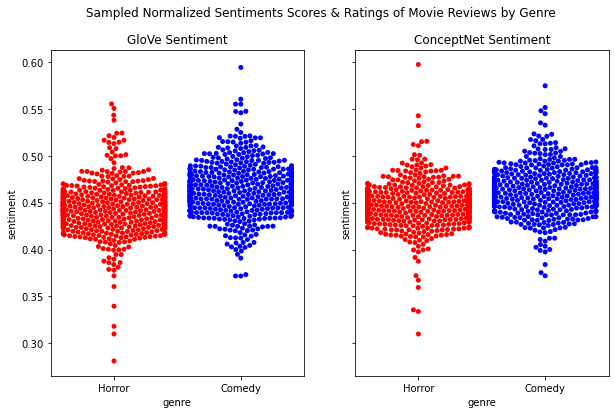

In [74]:
#Create a Swarm plot
fig, axes = plt.subplots(1, 2, figsize=(10,6), sharey=True)
fig.suptitle('Sampled Normalized Sentiments Scores & Ratings of Movie Reviews by Genre')

# Plot the sampled Glove data for sentiment
sns.swarmplot(ax=axes[0], x='genre', y='sentiment', data=df_glove_sampled, palette={'Comedy': 'blue', 'Horror': 'red'})
axes[0].set_title('GloVe Sentiment')

## ConceptNet
# Plot the sampled ConcepNet data for sentiment
sns.swarmplot(ax=axes[1], x='genre', y='sentiment', data=df_cnnb_sampled, palette={'Comedy': 'blue', 'Horror': 'red'})
axes[1].set_title('ConceptNet Sentiment')

plt.show()

The normalized data in GloVe and ConceptNet the edge comedy has over horror. The horrow data sampled indicates that there are lower negative values associated with horror for both embeddings. 

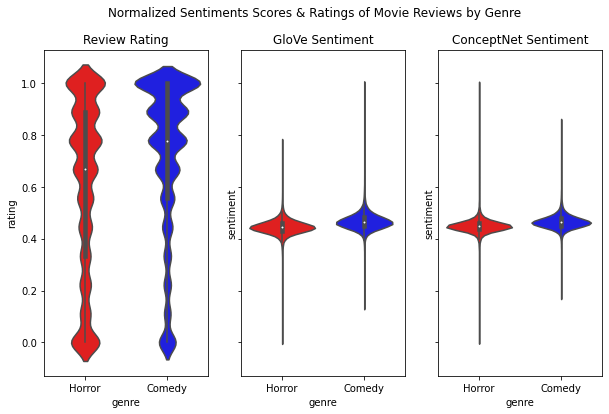

In [75]:
## Doing the same but with Violin Plots and against the entire dataset not just sampled

fig, axes = plt.subplots(1, 3, figsize=(10,6), sharey=True)
fig.suptitle('Normalized Sentiments Scores & Ratings of Movie Reviews by Genre')

## Review Rating
# Plot the data

sns.violinplot(ax=axes[0], x='genre', y='rating', data=df_combined_cnnb, palette={'Comedy': 'blue', 'Horror': 'red'})
axes[0].set_title('Review Rating')

## GloVe
# Plot the data
sns.violinplot(ax=axes[1], x='genre', y='sentiment', data=df_combined_glove, palette={'Comedy': 'blue', 'Horror': 'red'})
axes[1].set_title('GloVe Sentiment')

## ConceptNet
# Plot the data
sns.violinplot(ax=axes[2], x='genre', y='sentiment', data=df_combined_cnnb, palette={'Comedy': 'blue', 'Horror': 'red'})
axes[2].set_title('ConceptNet Sentiment')

plt.show()

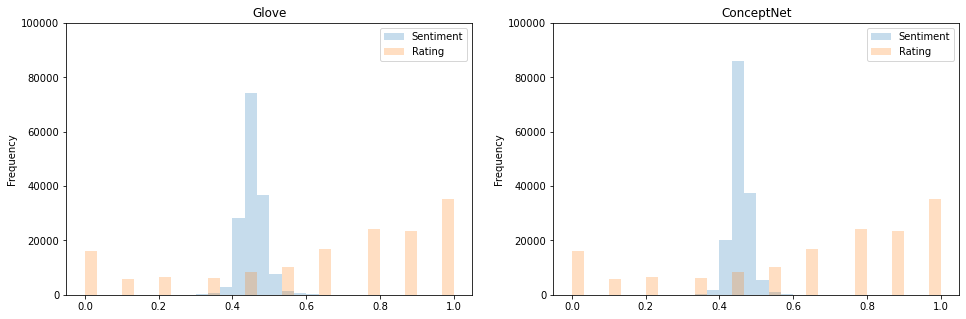

In [76]:
#snippet from our 7324 class by Dr E Larson
f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(1,2,1)
df_combined_glove.sentiment.plot(kind='hist', alpha=0.25, 
                        label="Sentiment",
                        bins=bin_num)

df_combined_glove.rating.plot(kind='hist', alpha=0.25, 
                        label="Rating",
                        bins=bin_num)
plt.title('Glove')
plt.legend()
plt.ylim([0, 100000])

plt.subplot(1,2,2)
df_combined_cnnb.sentiment.plot(kind='hist', alpha=0.25, 
                        label="Sentiment",
                        bins=bin_num)

df_combined_cnnb.rating.plot(kind='hist', alpha=0.25, 
                        label="Rating",
                        bins=bin_num)
plt.title('ConceptNet')
plt.legend()
plt.ylim([0, 100000])

plt.show()

The data in both Glove and ConceptNet show that overall there are higher ranked ratings regardless of the genre. But sentiment scores by the embeddings show data to be concentrated right about the median. There may be some values in the tail ends but they dont show up given the scale. 

Our interpretation is that many neutral words are shared between the genres and these words encompass most of the vocabulary. The slight skew can be attributed to words in horror reviews such as "murder", or words in comedy movies such as "laughing". For example, for a sentiment to match a 0 rating, the review would probably be "Murder murder murder murder murder", and a 10 rating would be "Happy happy happy happy happy."

Given this info we believe the spread is not as important of a metric as the skew.

### Plotting the Delta columns

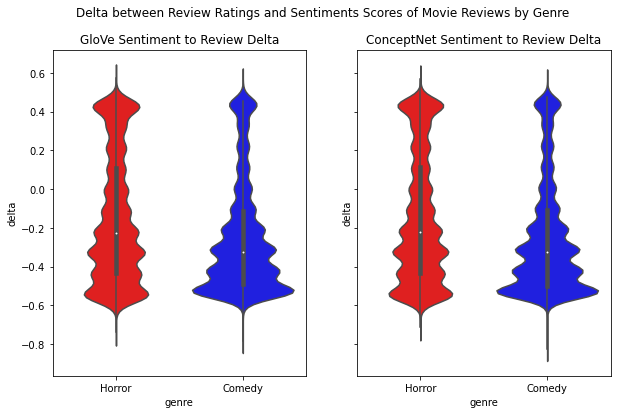

In [80]:
## Plotting the Delta columns
fig, axes = plt.subplots(1, 2, figsize=(10,6), sharey=True)
fig.suptitle('Delta between Review Ratings and Sentiments Scores of Movie Reviews by Genre')

## GloVe
# Plot the data
sns.violinplot(ax=axes[0], x='genre', y='delta', data=df_combined_glove, palette={'Comedy': 'blue', 'Horror': 'red'})
axes[0].set_title('GloVe Sentiment to Review Delta')

## ConceptNet
# Plot the data
sns.violinplot(ax=axes[1], x='genre', y='delta', data=df_combined_cnnb, palette={'Comedy': 'blue', 'Horror': 'red'})
axes[1].set_title('ConceptNet Sentiment to Review Delta')

plt.show()

The data above is similar for both ConceptNet and Glove. 

Overall it appears the number of positive Horror delta values are greater than  when number of instances of positive comedy delta values. This means sentiment scores tended to go higher than the corresponding ratings on some of the horror movie ratings. 

But for both horror and comedy, the bottom heavy violin plots indicate the ratings have a greater value than the sentiment score based on word analysis yielding a large number of negative delta values. A

The fact that the reviews and sentiment delta is very narrow at around the 0 and 0.2 mark indicate only few matched.

Another observation, the tail of the comedy values is long for ConeptNet, meaning the delta difference was that widespread from its true rating. The context of the review must have been lost in translation especially if there was some sarcasm involved as one might suspect for people who like comedy.

Overall sentiment analysis of reviews appears to be mismatched from the ratings. The ratings should be a good gauge for the reviews as there is generally a close correlation. But from the sentiment scores generated that is not the case. And eyeballing the data, horror scores have taken more of a hit as compared to the comedy scores.




#### Repeating the F stat on normalized data


In [81]:
#on normalized data, this may be the only f-stat data we need!

calc_stats(df_combined_glove, 'GloVe', 'sentiment', 'genre')
calc_stats(df_combined_cnnb, 'ConceptNet', 'sentiment', 'genre')


For  GloVe
--------------------
F-statistic:  18774.306421975893  , p value: 0.0 , alpha: 0.05 , f-critical: nan
Analysis on  sentiment  results based on F-stat:
  fcritical cannot be used for comparision as it is nan
  p value is less than alpha : Reject the null hypothesis

For  ConceptNet
--------------------
F-statistic:  15755.665718197148  , p value: 0.0 , alpha: 0.05 , f-critical: nan
Analysis on  sentiment  results based on F-stat:
  fcritical cannot be used for comparision as it is nan
  p value is less than alpha : Reject the null hypothesis


Based on the statistical analysis, the null hypothesis must be rejected even for scaled data. We chose 0.05 which is a typical alpha level.

Beware the perils of incorrect scaling:
As a part of the exercise of learning through the process, we discovered some anomaly in the way we handled scaling.  Our first approach, we took each individual genre_embedding dataframe and scaled it, instead of scaling the combined embedding list. ie. df_romcom_glove.. was fit_transformed and df_horror_glove was fit_transformed before being combined as the df_combined_glove set.
When we ran the f-stat on such a scaled-in-isolation dataframe, we got astronomical values for f-stat for the "normalized data" and that didnt match the pre normalization data values. This led us down a path of finding the root cause and correcting the issue. When we combined the lists and then scaled it, we got identical values for f-stat. ie combine the  two data frames for df_horror_glove and df_romcom_glove into df_combined_glove and then fit_transform that! Ditto for ConceptNet data.

Once we corrected that, as can be expected we saw identical values from pre scaled data and post.



### Comparing between Sentiment Scores for a genre
This sections seeks to combine data slightly differently, based on genre and compare how Glove and Concept Net performed.

In [82]:
#add a column for indicating the embedding used
df_horror_glove_trim['embedding'] ='GloVe'
df_horror_cnnb_trim['embedding'] = 'ConceptNet'

df_romcom_glove_trim['embedding'] ='GloVe'
df_romcom_cnnb_trim['embedding'] = 'ConceptNet'

df_combined_horror = pd.concat([df_horror_glove_trim[['rating', 'sentiment', 'embedding']], \
                                    df_horror_cnnb_trim[['rating', 'sentiment', 'embedding']]])

df_combined_comedy = pd.concat([df_romcom_glove_trim[['rating', 'sentiment', 'embedding']], \
                                    df_romcom_cnnb_trim[['rating', 'sentiment', 'embedding']]])

#scale rating
df_combined_horror['rating'] = scaler.fit_transform(df_combined_horror[['rating']])
df_combined_comedy['rating'] = scaler.fit_transform(df_combined_comedy[['rating']])

#scale sentiment
df_combined_horror['sentiment'] = scaler.fit_transform(df_combined_horror[['sentiment']])
df_combined_comedy['sentiment'] = scaler.fit_transform(df_combined_comedy[['sentiment']])

# Add a new column to each DataFrame to find the delta between sentiment and rating
df_combined_horror['delta'] = df_combined_horror['sentiment'] - df_combined_horror['rating']
df_combined_comedy['delta'] = df_combined_comedy['sentiment'] - df_combined_comedy['rating']



#### Visualizing the data

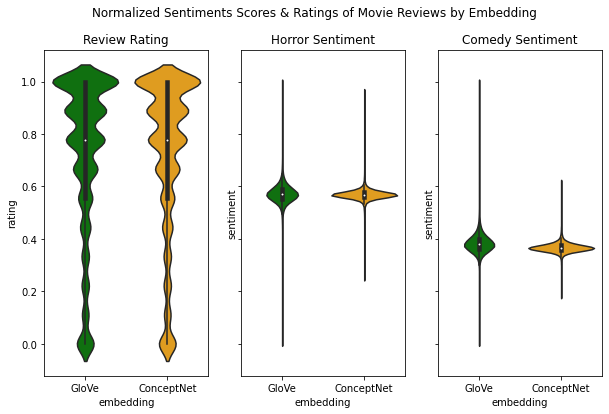

In [83]:

fig, axes = plt.subplots(1, 3, figsize=(10,6), sharey=True)
fig.suptitle('Normalized Sentiments Scores & Ratings of Movie Reviews by Embedding')

## Review Rating
# Plot the data
sns.violinplot(ax=axes[0], x='embedding', y='rating', data=df_combined_comedy, palette={'GloVe': 'green', 'ConceptNet': 'Orange'})
axes[0].set_title('Review Rating')

## Horror
# Plot the data
sns.violinplot(ax=axes[1], x='embedding', y='sentiment', data=df_combined_horror, palette={'GloVe': 'green', 'ConceptNet': 'Orange'})
axes[1].set_title('Horror Sentiment')

## Comedy
# Plot the data
sns.violinplot(ax=axes[2], x='embedding', y='sentiment', data=df_combined_comedy, palette={'GloVe': 'green', 'ConceptNet': 'Orange'})
axes[2].set_title('Comedy Sentiment')

plt.show()

#### Statistics on how the embedding worked on a genre
We are trying to quantify the differences that two different embedding models show when used on the same underlying data.
The null hypothesis again, is that there is no difference betweem the sentiment scores that the embeddings offer
The alternate hypothesis is that there is a difference between the scores for the two embeddings.

In [84]:

calc_stats(df_combined_horror, 'Horror', 'sentiment', 'embedding')
calc_stats(df_combined_comedy, 'Comedy', 'sentiment', 'embedding')


For  Horror
--------------------
F-statistic:  345.17506504529797  , p value: 5.7223361979243166e-77 , alpha: 0.05 , f-critical: nan
Analysis on  sentiment  results based on F-stat:
  fcritical cannot be used for comparision as it is nan
  p value is less than alpha : Reject the null hypothesis

For  Comedy
--------------------
F-statistic:  11144.797617332002  , p value: 0.0 , alpha: 0.05 , f-critical: nan
Analysis on  sentiment  results based on F-stat:
  fcritical cannot be used for comparision as it is nan
  p value is less than alpha : Reject the null hypothesis


Again the null hypothesis must be rejected. This means that statistically, the sentiment scores on the same reviews are different between GloVe and ConceptNet.

Since GloVe and ConceptNet are statistically different in terms of their variances on the same movie genre, and that ConceptNet is more neutral than GloVe, we can say that GloVe has a larger negative bias than ConceptNet.

<a href="#top">Back to Top</a>
<a id="P4"></a>
## 4.0 Conclusion

Our analysis confirms that while sentiment analysis of movie reviews provides valuable insights, it doesn't directly align with the numerical ratings given by reviewers. Interestingly, we found that ConceptNet performed better in capturing the overall sentiment for both horror and comedy movie reviews, closely mirroring the fluctuations in actual ratings.

In our study, we employed the f-statistic to demonstrate two key points: firstly, that horror movie reviews tend to have more negative sentiment compared to comedy movie reviews; and secondly, that the variance in sentiment captured by GloVe word embeddings significantly differs from that of ConceptNet embeddings. This suggests that ConceptNet may be more adept at understanding the nuanced sentiments expressed in movie reviews across different genres.

Therefore, if using these embeddings, it is important to be careful of their inherent biases in text sentiment.

**Identify two conferences or journals that would be interested in the results of your analysis.**
1. **International Conference on Computing, Communication and Security (ICCCS)**

- This conference has published studies related to large language models and their utility, and we are utilizing a dataset from a paper published at this conference from a few years ago.

2. **Conference on Neural Information Processing Systems (NeurIPS)**:

- NeurIPS is a leading conference in the field of machine learning and artificial intelligence. It often features papers and presentations on the development and applications of large language models, including research on mitigating bias.

- One relevant example is a paper that studies generative AI language models for biases for a host of groups when it comes to language associated with occupations. Source: https://proceedings.neurips.cc/paper/2021/hash/1531beb762df4029513ebf9295e0d34f-Abstract.html

3. **Association for Computational Linguistics (ACL)**:

- ACL is a major conference that focuses on natural language processing and computational linguistics. Researchers often present work related to large language models, bias detection, and mitigation strategies.

- One relevant example that studies language bias in a different way is one that has reviewed Wikipedia articles for "Framing Bias" where perspective-specific words are studied for subjectivity, and "Epistemological Bias", where conventionally-accepted assumptions are presented in the text. Source: https://aclanthology.org/P13-1162.pdf

4. **IEEE P3428: Standard for Large Language Model Agents for AI-powered Education**. While this is not a conference or a journal, part of the standard provides metrics and benchmarks for assessing effectiveness and the ethical considerations of LLM agents in educational settings.